mount google drive and authenticate to access files

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


check the currect directory content

In [ ]:
! ls

'Copy of ColabSettingAndAccess.ipynb'


change directory to specific dir

In [ ]:
%cd gdrive/MyDrive/'Collaborate '

/content/gdrive/MyDrive/Collaborate 


In [ ]:
%cd experiments

/content/gdrive/MyDrive/Collaborate /experiments


install any package if missing

In [ ]:
#! pip install <desired-python-library>

check the access of any file

In [ ]:
#from model import resolve_single

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline

In [ ]:
#pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 745 kB/s 


In [ ]:
def wrangle(filepath):
    df = pd.read_csv(filepath).set_index("policy_id")
    
    ## droping high cardinality features
    df = df.drop("area_cluster", axis = 1)
    
    return df

In [ ]:
df = wrangle("train.csv")
df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
policy_id,,,,,,,,,,,,,,,,,,,,,
ID00001,0.515874,0.05,0.644231,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
ID00002,0.672619,0.02,0.375000,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
ID00003,0.841110,0.02,0.384615,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
ID00004,0.900277,0.11,0.432692,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
ID00005,0.596403,0.11,0.634615,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
df.shape

(58592, 42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58592 entries, ID00001 to ID58592
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   population_density                58592 non-null  int64  
 4   make                              58592 non-null  int64  
 5   segment                           58592 non-null  object 
 6   model                             58592 non-null  object 
 7   fuel_type                         58592 non-null  object 
 8   max_torque                        58592 non-null  object 
 9   max_power                         58592 non-null  object 
 10  engine_type                       58592 non-null  object 
 11  airbags                           58592 non-null  int64  
 12  i

In [ ]:
# Checking for missing values
df.isnull().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width                               0
height      

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Checking for high cardinality categorical features
df.select_dtypes("object").nunique()

segment                              6
model                               11
fuel_type                            3
max_torque                           9
max_power                            9
engine_type                         11
is_esc                               2
is_adjustable_steering               2
is_tpms                              2
is_parking_sensors                   2
is_parking_camera                    2
rear_brakes_type                     2
transmission_type                    2
steering_type                        3
is_front_fog_lights                  2
is_rear_window_wiper                 2
is_rear_window_washer                2
is_rear_window_defogger              2
is_brake_assist                      2
is_power_door_locks                  2
is_central_locking                   2
is_power_steering                    2
is_driver_seat_height_adjustable     2
is_day_night_rear_view_mirror        2
is_ecw                               2
is_speed_alert           

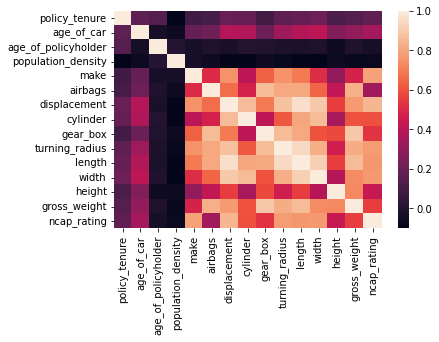

In [ ]:
## checking for multicollinearity 
correlation = df.select_dtypes("number").drop("is_claim", axis=1).corr()
sns.heatmap(correlation);

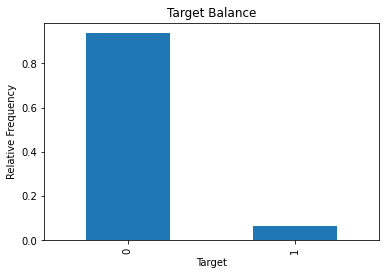

In [ ]:
# TARGET  BALANCE 
df["is_claim"].value_counts(normalize=True).plot(kind="bar")
plt.ylabel("Relative Frequency")
plt.xlabel("Target")
plt.title("Target Balance");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


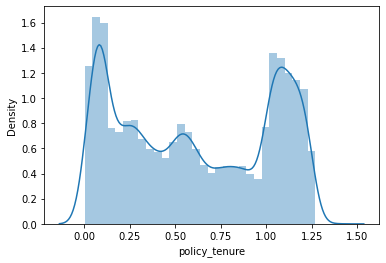

In [ ]:
# checking for outliers
sns.distplot(df["policy_tenure"]);

Text(0.5, 1.0, 'Numbers of sectors based on claims')

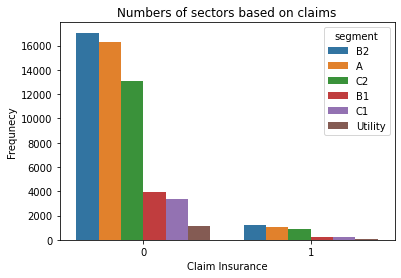

In [ ]:
# Numbers of segments based on cliams

ffg = df.groupby("is_claim")["segment"].value_counts().rename("Frequency").to_frame().reset_index()
sns.barplot(x="is_claim",
           y="Frequency",
           hue="segment",
           data=ffg)
plt.xlabel("Claim Insurance")
plt.ylabel("Frequnecy")
plt.title("Numbers of sectors based on claims")

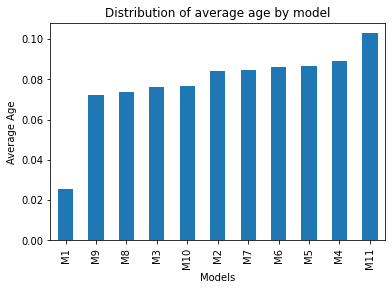

In [ ]:
## distribution of average age by model
df.groupby("model")["age_of_car"].mean().sort_values().plot(kind="bar")
plt.xlabel("Models")
plt.ylabel("Average Age")
plt.title("Distribution of average age by model");

In [ ]:
target = "is_claim"
X = df.drop(target, axis=1)
y = df[target]
print(X.shape, y.shape)

(58592, 41) (58592,)


In [46]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
X_train.info(),X_test.shape, y_train.shape, y_test.shape

<class 'pandas.core.frame.DataFrame'>
Index: 46873 entries, ID53609 to ID33004
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     46873 non-null  float64
 1   age_of_car                        46873 non-null  float64
 2   age_of_policyholder               46873 non-null  float64
 3   population_density                46873 non-null  int64  
 4   make                              46873 non-null  int64  
 5   segment                           46873 non-null  object 
 6   model                             46873 non-null  object 
 7   fuel_type                         46873 non-null  object 
 8   max_torque                        46873 non-null  object 
 9   max_power                         46873 non-null  object 
 10  engine_type                       46873 non-null  object 
 11  airbags                           46873 non-null  int64  
 12  i

(None, (11719, 41), (46873,), (11719,))

In [47]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(random_state=1)
X_train_over, y_train_over = sampler.fit_resample(X_train,y_train)

In [49]:
print(X_train_over.info(), y_train_over.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87764 entries, 0 to 87763
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     87764 non-null  float64
 1   age_of_car                        87764 non-null  float64
 2   age_of_policyholder               87764 non-null  float64
 3   population_density                87764 non-null  int64  
 4   make                              87764 non-null  int64  
 5   segment                           87764 non-null  object 
 6   model                             87764 non-null  object 
 7   fuel_type                         87764 non-null  object 
 8   max_torque                        87764 non-null  object 
 9   max_power                         87764 non-null  object 
 10  engine_type                       87764 non-null  object 
 11  airbags                           87764 non-null  int64  
 12  is_e

In [50]:
model_baseline = y_train.value_counts(normalize=True).max()
model_baseline

0.9361892774091695

In [ ]:
lr = make_pipeline(OneHotEncoder(),
                   LogisticRegression())
dt = make_pipeline(OrdinalEncoder(),
                  DecisionTreeClassifier(random_state=1))
rf = make_pipeline(OrdinalEncoder(),
                  RandomForestClassifier(random_state=1))
gb = make_pipeline(OrdinalEncoder(),
                  GradientBoostingClassifier(random_state=1))

In [ ]:
#pip install make_pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement make_pipeline (from versions: none)
ERROR: No matching distribution found for make_pipeline


In [ ]:
model_list = [("lr", lr),("dt", dt),("rf", rf),("gb", gb)]

In [52]:
for name, model in model_list:
    model.fit(X_train_over, y_train_over)
    
    y_pred = model.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)
    print(f"The test accuracy score of {name} is {score}")
    

The test accuracy score of lr is 0.4637767727621811
The test accuracy score of dt is 0.8827545012373069
The test accuracy score of rf is 0.9211536820547829
The test accuracy score of gb is 0.5745370765423671


In [ ]:
params = {"randomforestclassifier__n_estimators":range(25,125,25)}

In [ ]:
Model = GridSearchCV(rf,
                    param_grid=params,
                    cv=5,
                    n_jobs=-1,
                    verbose=1)
Model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(cols=['segment', 'model',
                                                             'fuel_type',
                                                             'max_torque',
                                                             'max_power',
                                                             'engine_type',
                                                             'is_esc',
                                                             'is_adjustable_steering',
                                                             'is_tpms',
                                                             'is_parking_sensors',
                                                             'is_parking_camera',
                                                             'rear_brakes_type',
                                                             'trans

In [ ]:
Model.best_score_

Model.best_params_

y_pred_test =  Model.predict(X_test)
print(round(accuracy_score(y_test, y_pred_test),2))



0.92


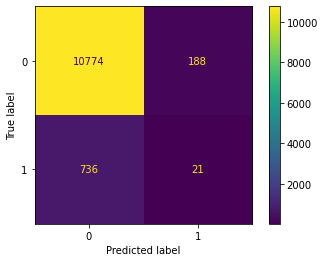

In [ ]:
ConfusionMatrixDisplay.from_estimator(Model, X_test, y_test);